# Graphs and Charts Testing

Below are some examples and common visualizations using Matplotlib and other libraries in Python

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import andrews_curves, parallel_coordinates
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
from pywaffle import Waffle
from scipy.spatial import ConvexHull

import warnings
warnings.filterwarnings(action='once')
warnings.simplefilter('ignore')

%matplotlib inline

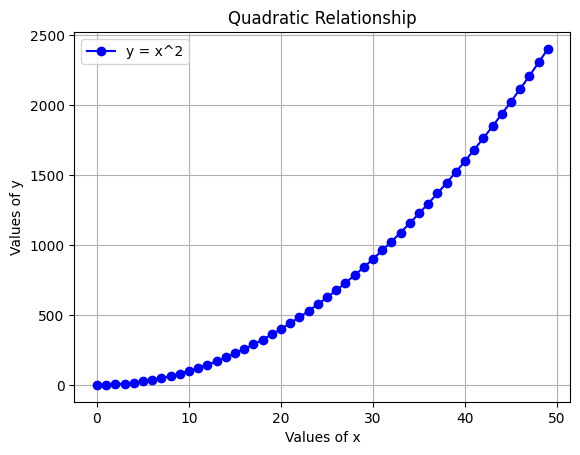

In [2]:
x = np.arange(50)
y = x**2

plt.plot(x, y, marker='o', linestyle='-', color='b', label='y = x^2')
plt.title('Quadratic Relationship')
plt.xlabel('Values of x')
plt.ylabel('Values of y')
plt.grid(True)
plt.legend()

plt.show()

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
large = 22; med = 16; small = 12
params = {
    'axes.titlesize': large,
    'legend.fontsize': med,
    'figure.figsize': (16, 10),
    'axes.labelsize': med,
    'xtick.labelsize': med,
    'ytick.labelsize': med,
    'figure.titlesize': large
}
plt.rcParams.update(params)
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_style("white")

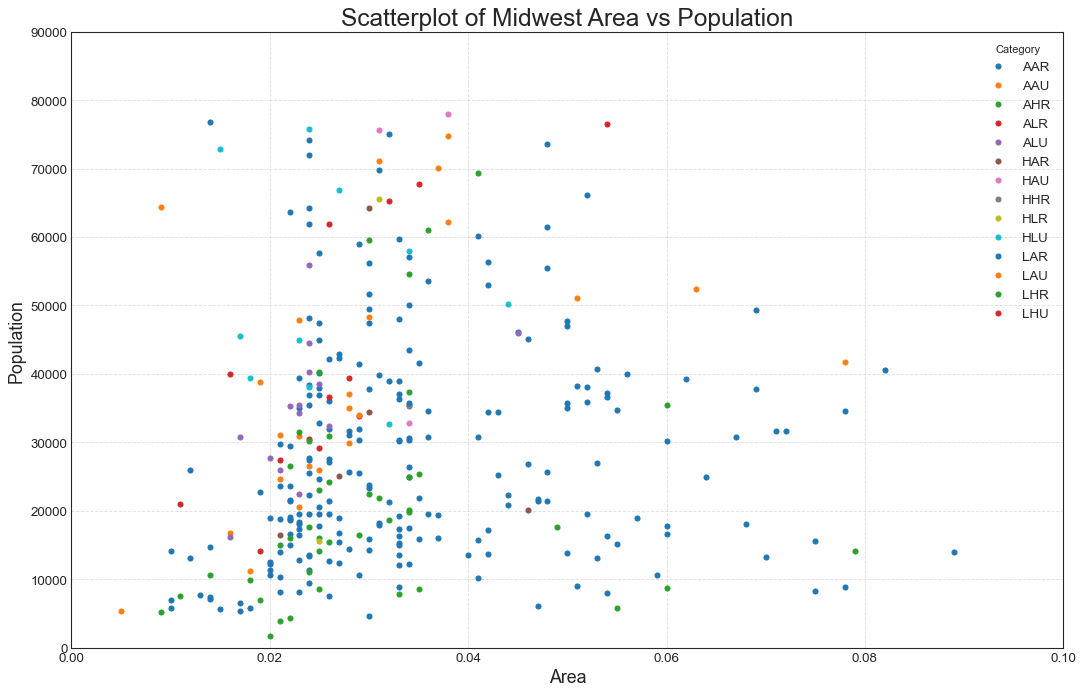

In [5]:
# Import dataset 
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data 
# Get unique categories
categories = df['category'].unique()

# Create as many colors as there are unique categories
colors = [plt.cm.tab10(i / len(categories)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

# Group data by category and plot each group
grouped = df.groupby('category')
for name, group in grouped:
    plt.scatter(group['area'], group['poptotal'], s=20, label=name)

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000), 
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(title='Category', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()  

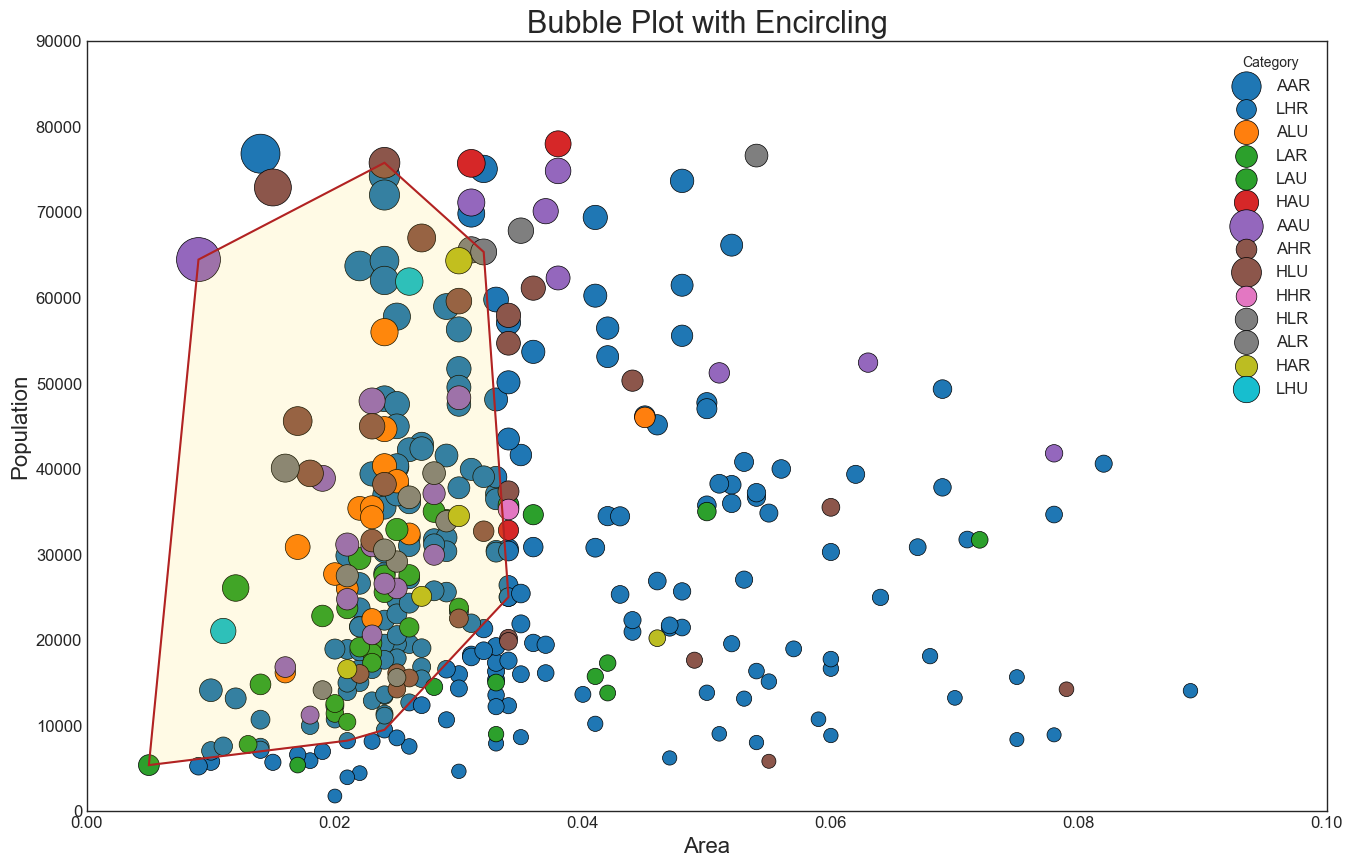

In [6]:
sns.set_style("white") 

# Draw Scatterplot with unique color for each category
for i, category in enumerate(categories):
    subset = df[df['category'] == category]
    plt.scatter(subset['area'], subset['poptotal'], 
                s=subset['dot_size'], c=[colors[i]], label=category, 
                edgecolors='black', linewidths=0.5)

# Encircling
def encircle(x, y, ax=None, **kwargs):
    if not ax: 
        ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kwargs)
    ax.add_patch(poly)

# Select data to be encircled
df_encircle_data = df[df['state'] == 'IN']                    

# Draw polygons around selected data points 
encircle(df_encircle_data['area'], df_encircle_data['poptotal'], 
         ec="k", fc="gold", alpha=0.1)
encircle(df_encircle_data['area'], df_encircle_data['poptotal'], 
         ec="firebrick", fc="none", linewidth=1.5)

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12, title='Category')    

plt.show() 

<Figure size 800x640 with 0 Axes>

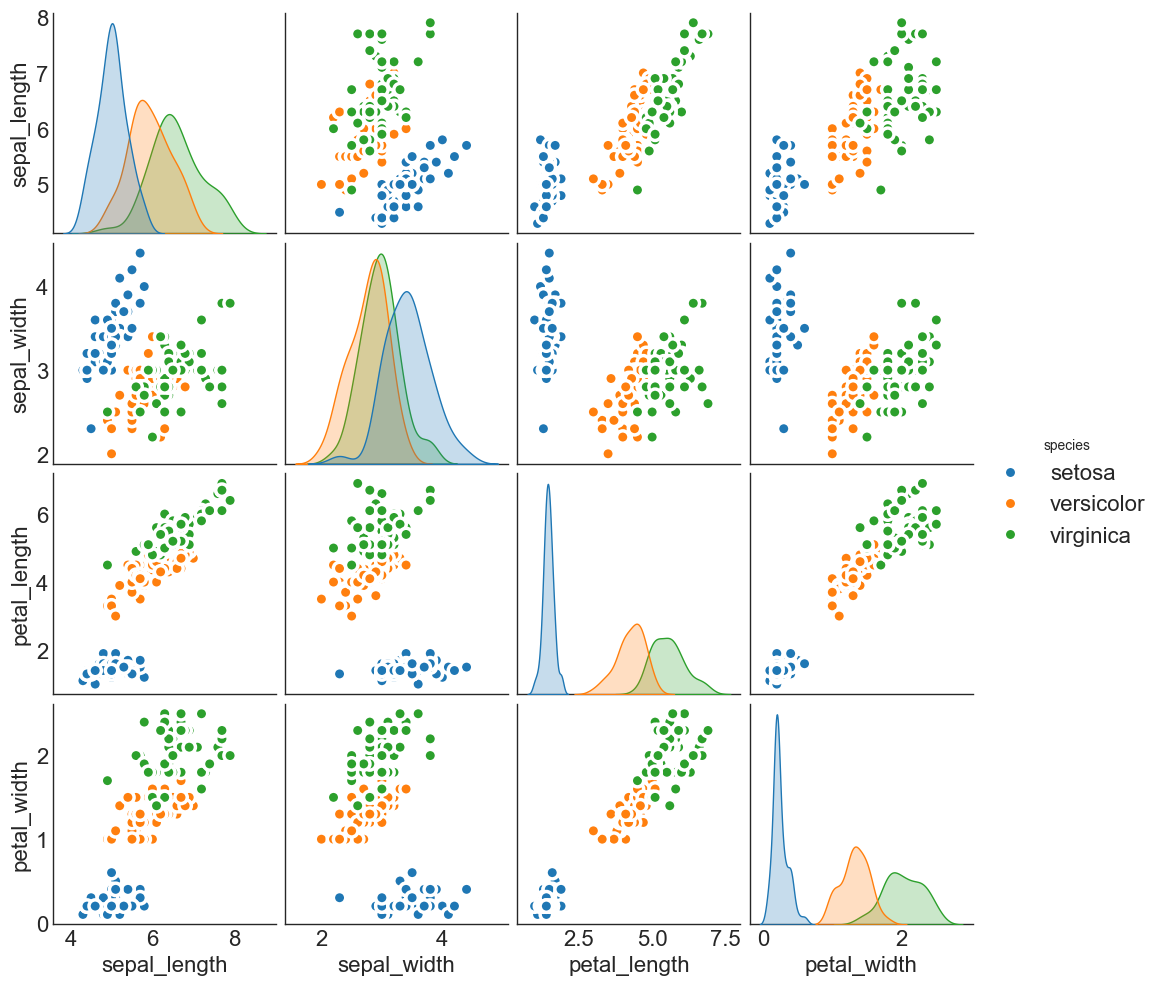

In [7]:
# Import dataset
df = sns.load_dataset('iris')

plt.figure(figsize=(10, 8), dpi=80)

sns.pairplot(df, kind="scatter", hue="species", 
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

plt.show()

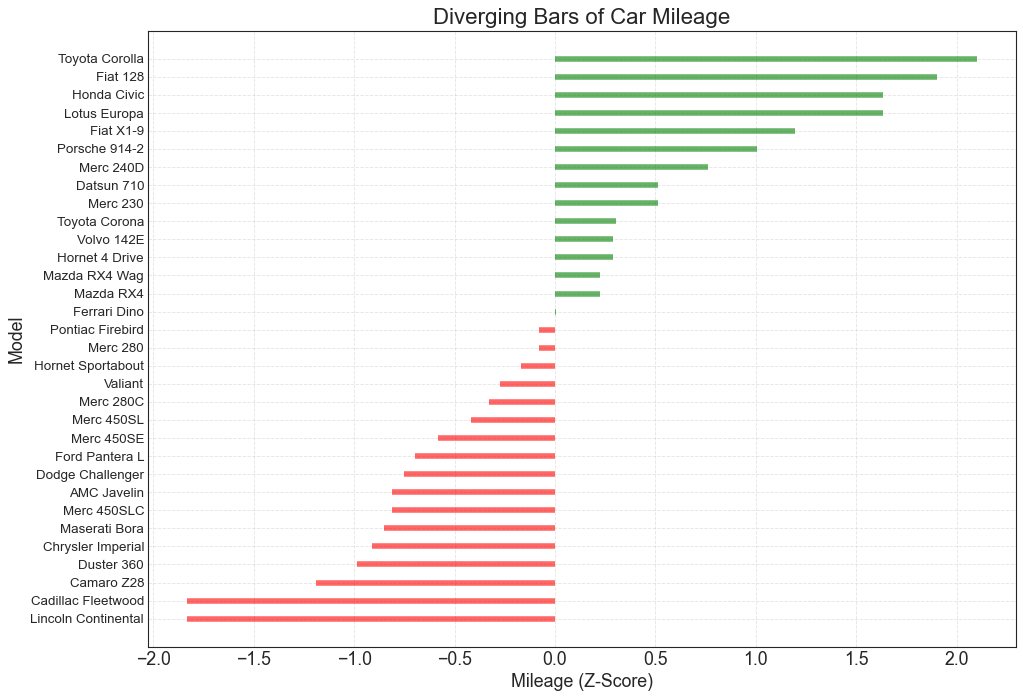

In [8]:
# Import dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# Compute the z-scores for 'mpg'
df['mpg_z'] = (df['mpg'] - df['mpg'].mean()) / df['mpg'].std()

# Assign colors based on the z-scores
df['colors'] = df['mpg_z'].apply(lambda x: 'red' if x < 0 else 'green')

df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True, drop=True)

# Draw plot
plt.figure(figsize=(14, 10), dpi=80)
plt.hlines(y=df.index, xmin=0, xmax=df['mpg_z'], color=df['colors'], alpha=0.6, linewidth=5)

# Decorations
plt.gca().set(ylabel='Model', xlabel='Mileage (Z-Score)')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size': 20})
plt.grid(linestyle='--', alpha=0.5)

plt.show()

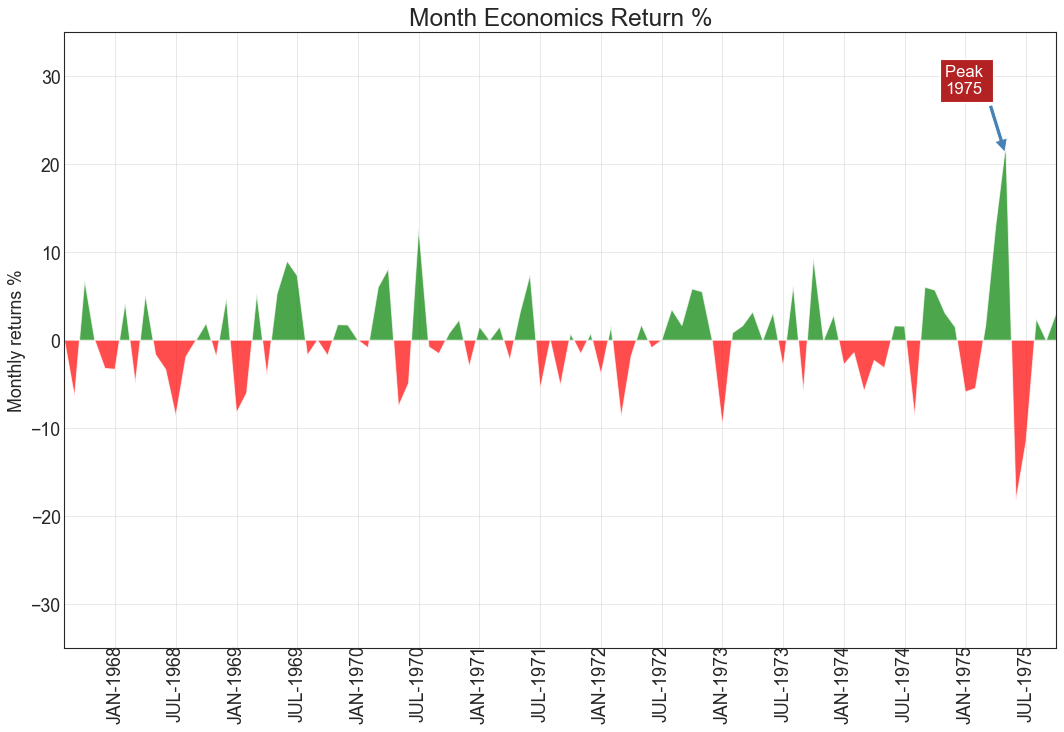

In [9]:
# Import dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date']).head(100)

# Calculate returns
x = np.arange(df.shape[0])
y_returns = (df.psavert.diff() / df.psavert.shift(1)).fillna(0) * 100

# Plot
plt.figure(figsize=(16, 10), dpi=80)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)

# Annotate
plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')

# Decorations
xtickvals = [str(m)[:3].upper() + "-" + str(y) for y, m in zip(df.date.dt.year, df.date.dt.month_name())]
plt.gca().set_xticks(x[::6])
plt.gca().set_xticklabels(xtickvals[::6], rotation=90, 
                          fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})
plt.ylim(-35,35)
plt.xlim(1, 99)
plt.title("Month Economics Return %", fontsize=22)
plt.ylabel('Monthly returns %')
plt.grid(alpha=0.5)

plt.show()

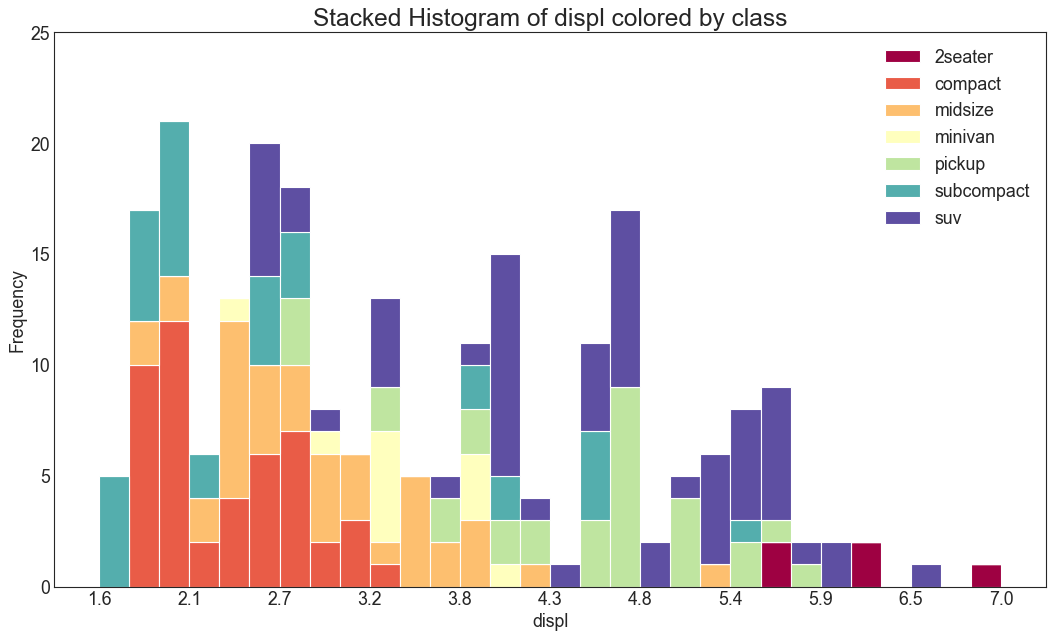

In [10]:
# Import dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [group[x_var].values.tolist() for _, group in df_agg]

# Draw
plt.figure(figsize=(16, 9), dpi=80)
colors = [plt.cm.Spectral(i / float(len(vals) - 1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of {x_var} colored by {groupby_var}", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])

plt.show()

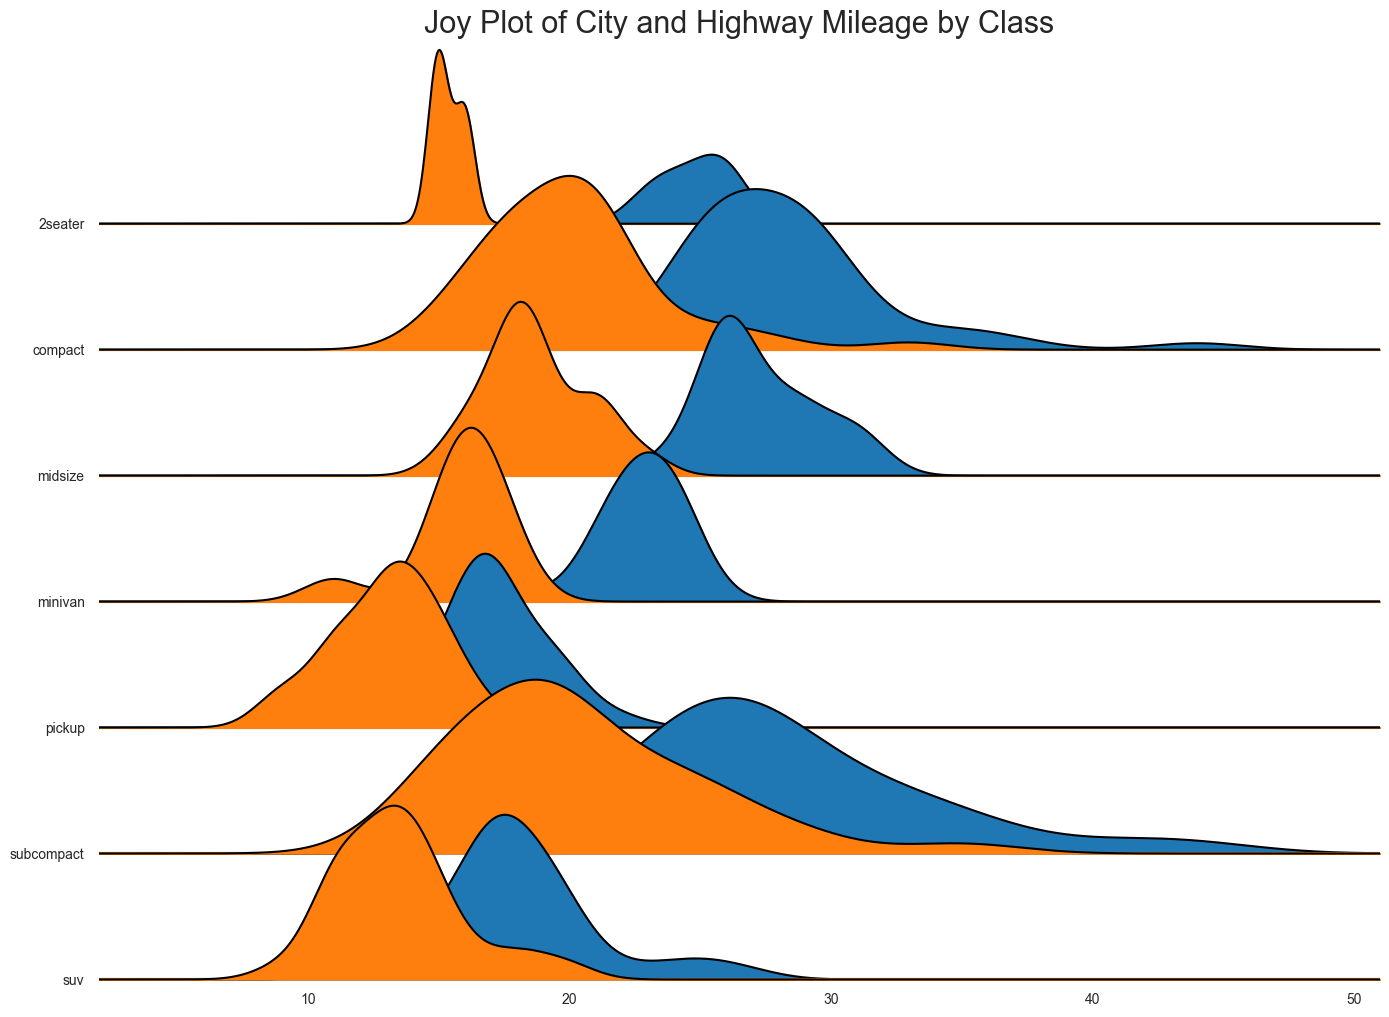

In [11]:
# Import dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
fig, axes = joypy.joyplot(df, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)

plt.show()

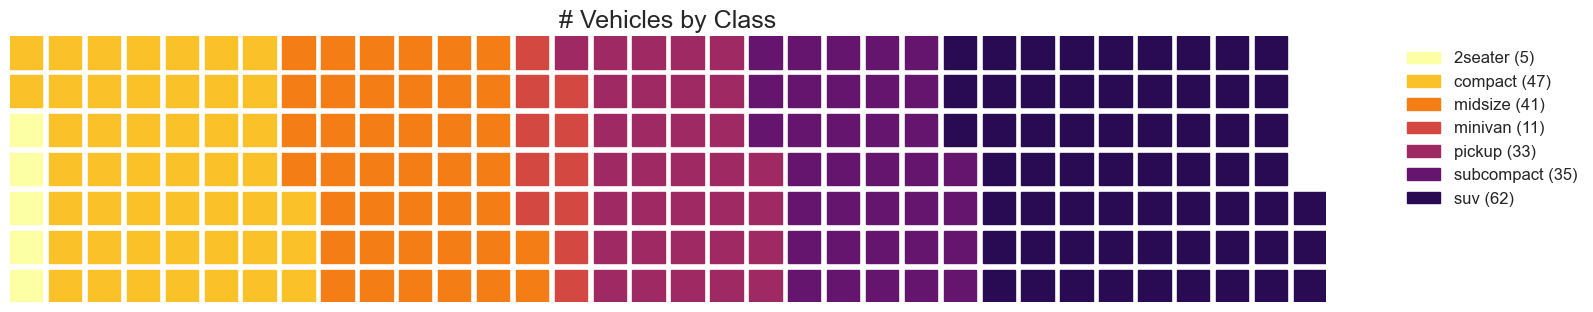

In [12]:
# Import dataset
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i / float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle, 
    rows=7, 
    values=df['counts'], 
    labels=["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples(index=False)],
    colors=colors,
    figsize=(16, 9),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
    title={'label': '# Vehicles by Class', 'loc': 'center', 'fontsize': 18}
)

plt.show()

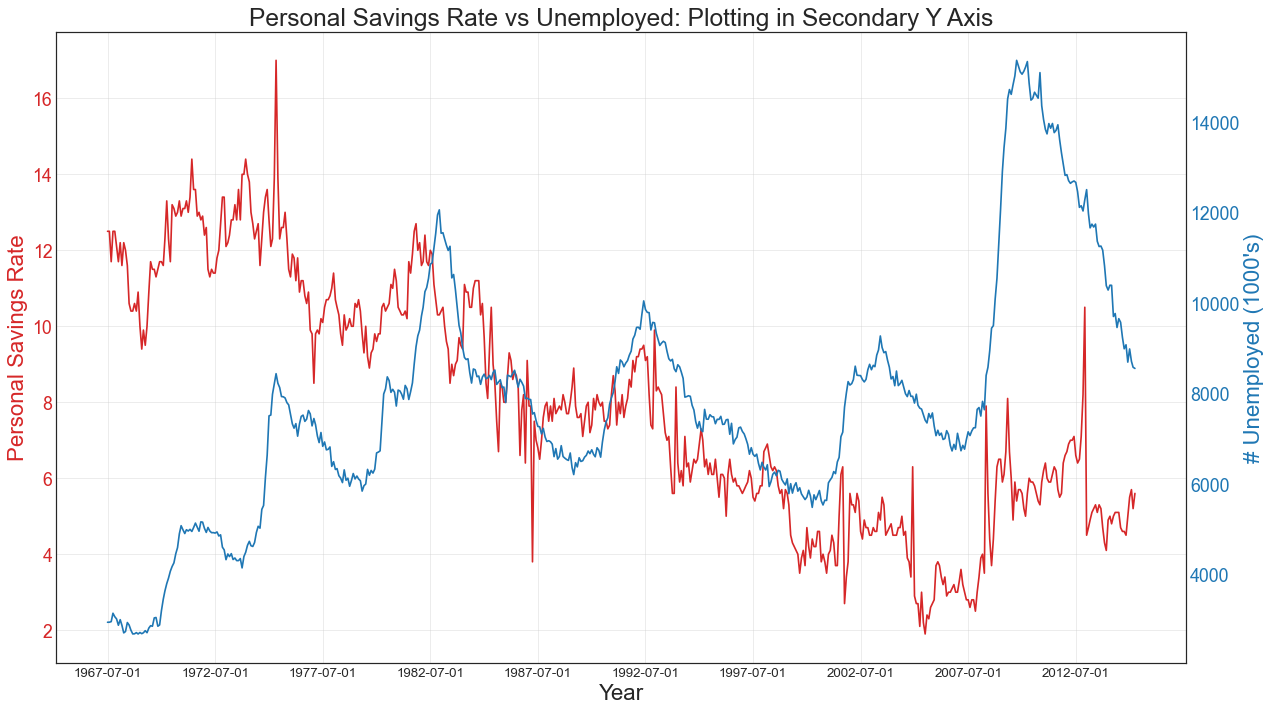

In [13]:
# Import dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date'])

x = df['date']
y1 = df['psavert']
y2 = df['unemploy']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1, 1, figsize=(16, 9), dpi=80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red')
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(x[np.arange(0, len(x), 60)])
ax2.set_xticklabels([date.strftime('%Y-%m-%d') for date in x[np.arange(0, len(x), 60)]], rotation=90, fontsize=10)
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)
fig.tight_layout()

plt.show()

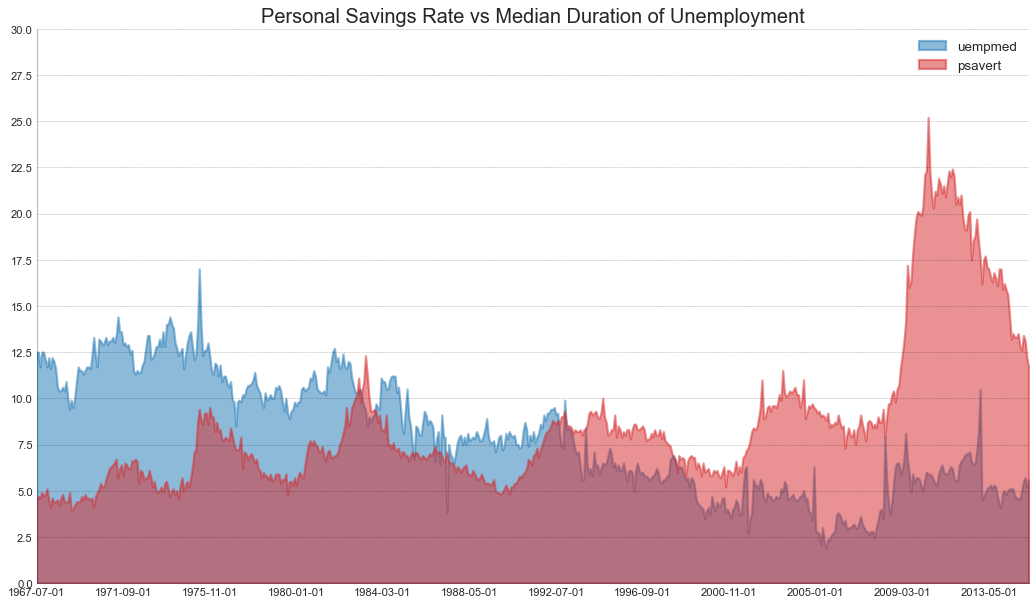

In [14]:
# Import dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date'])

# Prepare Data
x = df['date']
y1 = df['psavert']
y2 = df['uempmed']
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['psavert', 'uempmed']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16, 9), dpi=80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)

# Format x-axis
plt.xticks(df['date'][::50], [date.strftime('%Y-%m-%d') for date in df['date'][::50]], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0, 31, 2.5), fontsize=10)
plt.xlim(df['date'].min(), df['date'].max())  # Proper limits for the date range

# Draw Tick lines
for y in np.arange(0, 31, 2.5):    
    ax.hlines(y, xmin=df['date'].min(), xmax=df['date'].max(), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Lighten borders
ax.spines["top"].set_alpha(0)
ax.spines["bottom"].set_alpha(0.3)
ax.spines["right"].set_alpha(0)
ax.spines["left"].set_alpha(0.3)

plt.show()

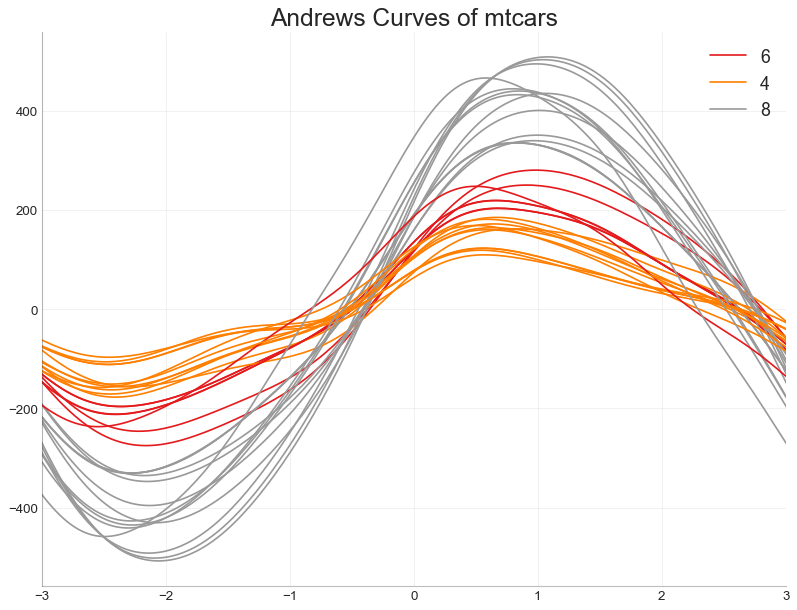

In [15]:
# Import dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df.drop(['cars', 'carname'], axis=1, inplace=True)

# Plot
plt.figure(figsize=(12, 9), dpi=80)
andrews_curves(df, 'cyl', colormap='Set1')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(0.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3, 3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

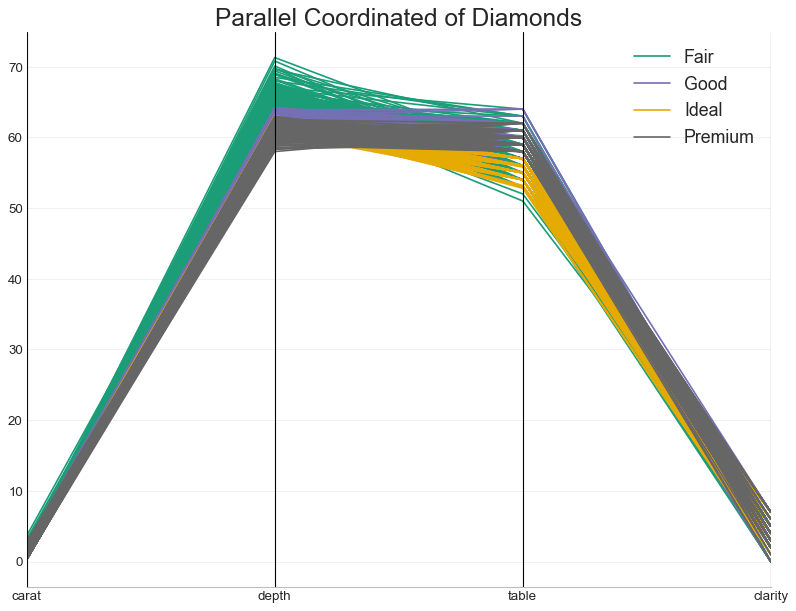

In [16]:
# Import dataset
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv")

# Plot
plt.figure(figsize=(12, 9), dpi=80)
parallel_coordinates(df, 'cut', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(0.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

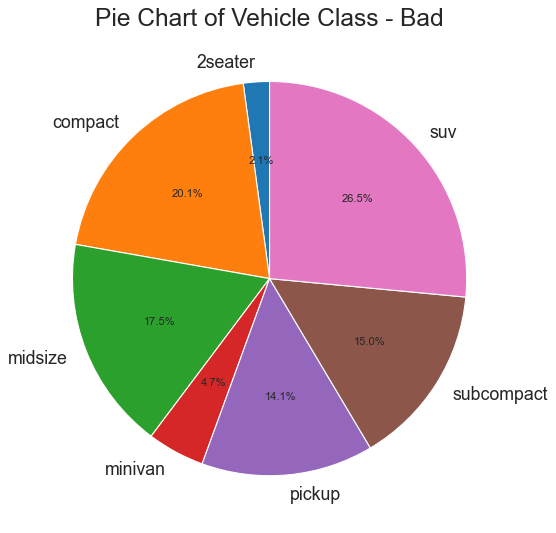

In [17]:
# Import dataset
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

df = df_raw.groupby('class').size()

plt.figure(figsize=(8, 8), dpi=80)

df.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()